# Gender Stereotypes in Romantic Relationships

The data was collected in an online survey using [Google Forms](https://www.google.com/forms/about/). A total of 51 responses were collected, of which 48 were deemed to be valid. The data was anonymized and available in this repository. Let's read in the data first into a dataframe.

In [17]:
raw_data <- read.csv('anonymized-data.csv', head=TRUE, fileEncoding="latin1")

Let's look at the first 3 lines to inspect the data

In [18]:
head(raw_data,3)

Timestamp,IÕm.over.18.years.of.age,I.consent.to.participate.in.the.study,Who.has.the.final.say.in.making.decisions.about.the.following.six.issues....Buying.a.car.or.furniture.,Who.has.the.final.say.in.making.decisions.about.the.following.six.issues....Having.children.,Who.has.the.final.say.in.making.decisions.about.the.following.six.issues....What.house.or.apartment.to.take.,Who.has.the.final.say.in.making.decisions.about.the.following.six.issues....What.job.either.partner.should.take.,Who.has.the.final.say.in.making.decisions.about.the.following.six.issues....Whether.a.partner.should.go.to.work.or.quit.work.,Who.has.the.final.say.in.making.decisions.about.the.following.six.issues....How.much.money.to.spend.each.week.on.food.,Please.choose.one.option.for.each.of.the.following.questions..I.feel.my.partner.is.affectionate.enough.,⋯,Age,Number.of.male.siblings,Number.of.female.siblings,Would.you.consider.yourself.having.influenced.by.female.figures.other.than.your.mother.,Have.you.spent.substantial.amount.of.time.with.cousins..first.or.second..in.your.childhood.or.in.your.adulthood.,If.yes..how.many.were.males..approx..,If.yes..how.many.were.females..approx...,Which.of.the.following.best.describes.your.current.relationship.status.,Length.of.the.current.relationship..if.applicable..approx..,Who.has.the.final.say.in.making.decisions.about.the.following.six.issues....How.much.money.to.send.to.relatives.
9/25/2015 12:46:33,Yes,Yes,you alone,you and your partner exactly the same,you alone,you and your partner exactly the same,your partner alone,you and your partner exactly the same,Sometime,⋯,26,1,1,No,No,,,Seperated,,
9/25/2015 13:55:46,Yes,Yes,you alone,you and your partner exactly the same,you and your partner exactly the same,you and your partner exactly the same,your partner more than you,you and your partner exactly the same,A good part of the time,⋯,26,0,3,No,No,2,5,"Single, never married",1 year,
9/25/2015 17:30:23,Yes,Yes,you more than your partner,you and your partner exactly the same,you and your partner exactly the same,you and your partner exactly the same,your partner more than you,you and your partner exactly the same,Sometime,⋯,24,1,0,No,No,,,"Single, never married",,


We first compute the following scales from this raw data. Check the [procedure section](report.pdf) for more details on these scales. 
* Self Perceived Decision Making Power (SPDM)
* Index of Marital Satisfaction (IMS)
* Shared Power Index 
* Decision Power Index
* Cross Classified Relationships

We have a handy [python script](compute_scales.py) to compute the above scales from the raw data and create a new data file that will easier to analyze. You can run the script as follows:
```
python compute_scales.py anonymized-data.csv
```

For convenience, we have already executed the above command, and 'output.csv' is available along with this repository.

In [54]:
data <- read.csv(file='output.csv', head=TRUE)
head(data,3)

X,Timestamp,Above18,Consent,spdm_q1,spdm_q2,spdm_q3,spdm_q4,spdm_q5,spdm_q6,⋯,cousins_num_males,cousins_num_females,relationship_status,current_relationship_length,spdm_q7,spdm,ims,DecisionPowerIndex,SharedPowerIndex,CrossClassifyDecisionPowerIndex
0,9/25/2015 12:46:33,Yes,Yes,you alone,you and your partner exactly the same,you alone,you and your partner exactly the same,your partner alone,you and your partner exactly the same,⋯,0,0,Seperated,0,,23,34,65.71,57.14,divided-power
1,9/25/2015 13:55:46,Yes,Yes,you alone,you and your partner exactly the same,you and your partner exactly the same,you and your partner exactly the same,your partner more than you,you and your partner exactly the same,⋯,2,5,Single-never married,1,,22,25,62.86,71.43,equalitarian
3,9/26/2015 10:09:36,Yes,Yes,you more than your partner,you and your partner exactly the same,you and your partner exactly the same,you and your partner exactly the same,you and your partner exactly the same,you and your partner exactly the same,⋯,2,4,Single-never married,0,,22,48,62.86,85.71,equalitarian


In [55]:
# Compute mean and standard deviation of age of participants
cat('Mean : ', mean(data$Age, na.rm = TRUE), ' SD : ', sd(data$Age, na.rm = TRUE))

# Compute range of age of participants
summary(data$Age, na.rm = TRUE)

Mean :  29.34783  SD :  9.922404

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  20.00   23.25   26.50   29.35   29.00   58.00       2 

In [63]:
# We will use the ggplot2 library for plotting
library(ggplot2)
library(repr)
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=10, repr.plot.height=3)

We look at the distribution of relationship statuses in the sample, since we expect a lot of variability in responses between broad groups (e.g. married vs not-married)

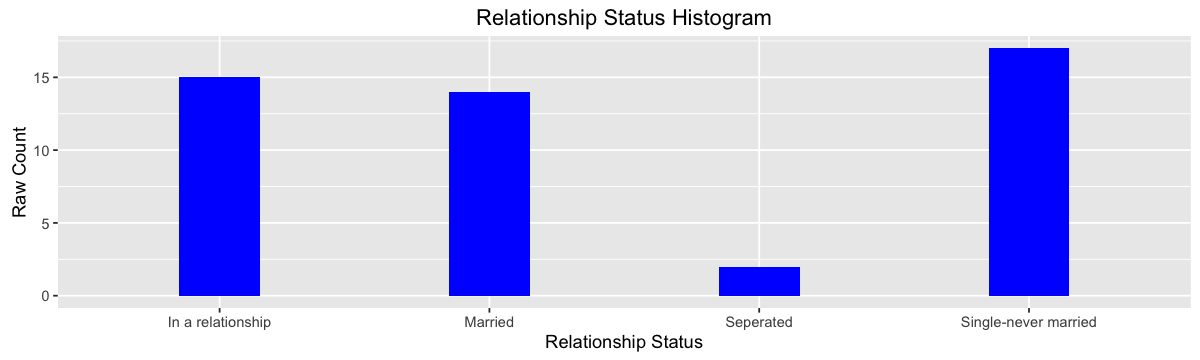

In [64]:
# Plot frequency histogram of Relationship Status
rs <- data$relationship_status
ggplot(data.frame(rs),aes(x=rs)) + geom_bar(fill="blue", width=.3) + xlab('Relationship Status') + ylab('Raw Count') + ggtitle('Relationship Status Histogram')

Based on the above, we will create few subsets of the data for analyzing specific groups.  

In [65]:
# Filter out participants with current relationship status > 0
data_non_zero_r_length <-data[data$current_relationship_length > 0,]
# Filter out participants who are single (31)
data_non_single <-data[data$relationship_status != "Single-never married",]
# Get number of participants with a relationship > 2 years
num_above_2 <- nrow(data[data$current_relationship_length > 2,])
cat ('Number of participants with relationship length greater than 2 years : ', num_above_2)

Number of participants with relationship length greater than 2 years :  19

Let's look at the distribution of relationship length in this dataset.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”

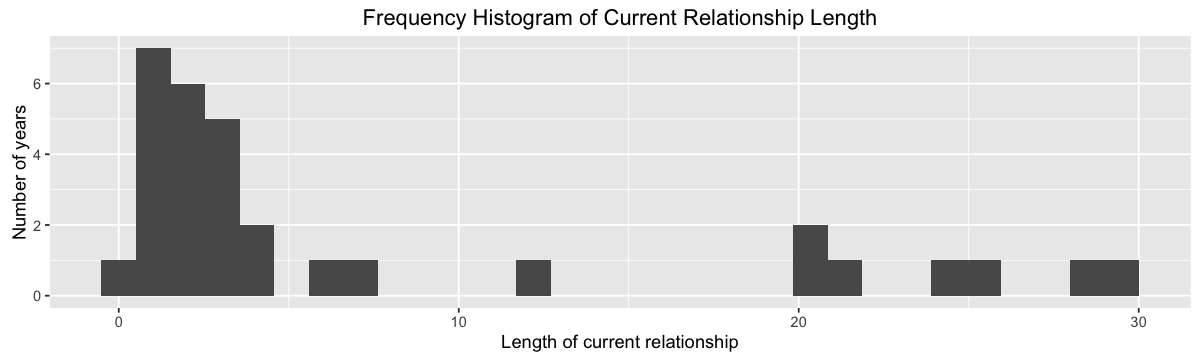

In [66]:
# Plot frequency histogram for length of relationship
qplot(current_relationship_length, data=data_non_zero_r_length, geom="histogram") + ggtitle('Frequency Histogram of Current Relationship Length') + xlab('Length of current relationship') + ylab('Number of years')